In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
import warnings
warnings.filterwarnings('ignore') # disabling warnings for presentation/ bad practice don't do it.

<br>

## Summary:
- What is Machine learning?
- Types of machine learning and problem classification
- Machine learning pipeline
- Using the breast cancer dataset to solve binary classification problem
- Walk though the entire pipeline step by step using the dataset
- Special emphasis on Modeling (comprises theory for algorithms) with:
 * Gaussian Naive Bayes
 * Support Vector Machine(SVM)
 * Logistic Regression
- Understanding the model after training: overfitting and underfitting
- Model Evaluation
- After cross validation/ testing across different models, recommend the best one. 

## What is Machine Learning?
“Machine learning is the science of getting computers to act without being explicitly programmed.” - Stanford

## Different types of Machine Learning:

- Supervised Learning
-  Unsupervised Learning
- Reinforcement Learning 

### Supervised Learning

In <b>supervised learning</b>, we are given a data set and already know what our correct output should look like, having the idea that there is a relationship between the input and the output. The inputs are the features, and output are the labels.
The two tasks of supervised learning: <i> <b>regression</b></i>  and <i> <b> classification.</b></i> 
In a <i> <b>regression</b></i>  problem, we are trying to predict results within a continuous output, meaning that we are trying to map input variables to some continuous function. In a <i> <b> classification.</b></i> problem, we are instead trying to predict results in a discrete output. In other words, we are trying to map input variables into discrete categories. This also means that we are trying to find a decision boundary. 

- Examples for classification: Binary classification ( churn/no churn, malginant/benign etc), Multi Class - (Classify a handwritten digit etc)
- Example for regression: Predicting housing price, stock price etc ( Continuous )

### Unsupervised Learning

In <b>unsupervised learning</b>, we approach problems with little or no idea what our results should look like. We can derive structure from data where we don't necessarily know the effect of the variables.We can derive this structure by <b>clustering</b> the data based on relationships among the variables in the data.

Examples: Determining different foods in a basket based on certain features etc

### Reinforcement Learning

<b>Reinforcement learning </b> is the training of machine learning models to make a sequence of decisions. The agent learns to achieve a goal in an uncertain, potentially complex environment. In reinforcement learning, an artificial intelligence faces a game-like situation. The computer employs trial and error to come up with a solution to the problem. To get the machine to do what the programmer wants, the artificial intelligence gets either rewards or penalties for the actions it performs. Its goal is to maximize the total reward.

Example: PC games where enemy changes moves based on your performance, robot learning to run etc

<br>

## What does a Machine Learning pipeline look like?

<img src="images/pipeline.png">

<br>

## Goal: Binary Classification Problem
### Look at the breast cancer data from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data and walk through the machine learning process, with more emphasis on Modeling and how to apply/validate ML algorithms

<br>

## Loading the dataset:
The raw data is already transformed, so we can move to the pre-processing part directly

In [39]:
df = pd.read_csv('data.csv')

In [40]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data pre-processing 
- Dropping unnecessary columns
- Changing Labels from string to binary, changing column names
- Removing/ Filling NaNs, making sure the right datatypes
- Outlier detection/removal

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [42]:
df.drop(columns = ['Unnamed: 32', 'id'], inplace=True)

In [43]:
def replace_label(x):
    if x is 'M':
        return 1
    else:
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(replace_label)

In [44]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [45]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [46]:
standard_error_columns = [i for i in df.columns if i.endswith('_se')]

In [47]:
df.drop(columns = standard_error_columns, inplace = True) 

In [48]:
df.shape

(569, 21)

## Feature Extraction
- Use domain knowledge to select features, if any
- Check for correlation with churn markers
- Remove highly correlated variables, as we want independent features
- Understanding if data is linearly seperable
- Check if dataset is balanced
- Focus on understanding the dataset/ features
- Most time consuming for solving a real life problem


### Correlation Matrix:

In [49]:
df.corr().abs()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


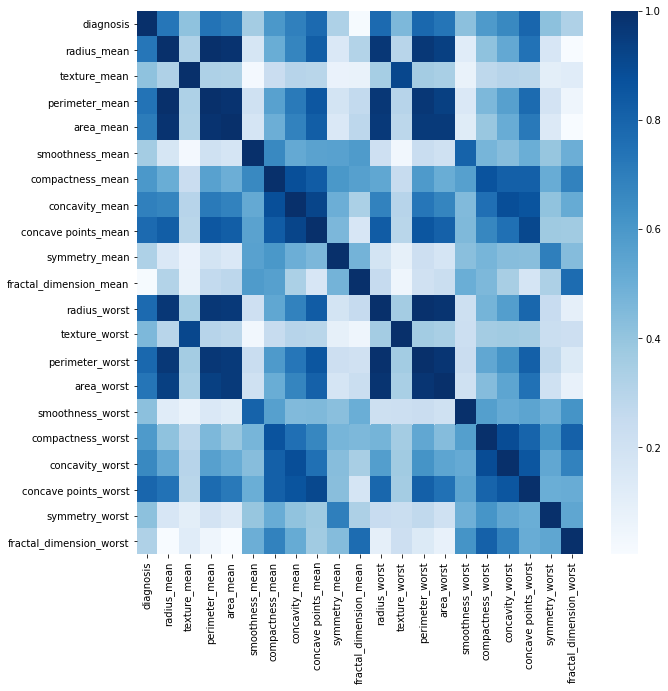

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),cmap='Blues',annot=False) 

In [51]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [52]:
df.drop(columns = to_drop, inplace=True)

In [53]:
df.shape

(569, 13)

In [54]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.1374,0.2050,0.4000,0.2364,0.07678


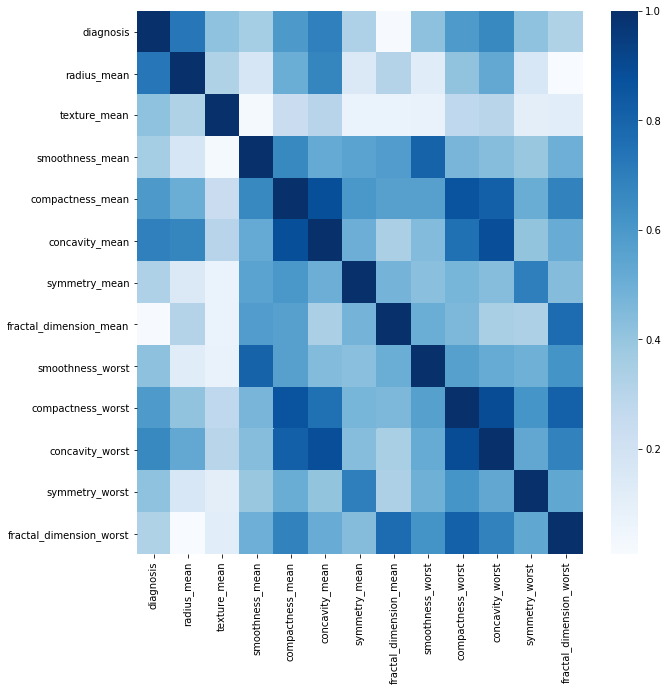

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(),cmap='Blues',annot=False) 

In [56]:
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.132369,0.254265,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.022832,0.157336,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.071170,0.027290,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.116600,0.147200,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.131300,0.211900,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.146000,0.339100,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,0.222600,1.058000,1.252000,0.663800,0.207500


In [57]:
# Need to add some box plot to understand/detect outliers

## Some plots to understand the distribution better

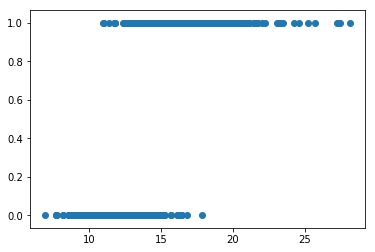

In [27]:
plt.figure()
plt.scatter(df['radius_mean'], df['diagnosis'])
plt.show()

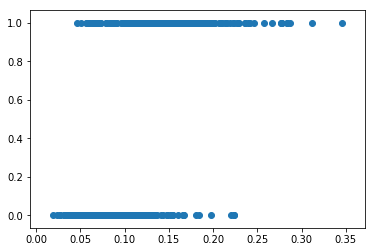

In [28]:
plt.figure()
plt.scatter(df['compactness_mean'], df['diagnosis'])
plt.show()

In [58]:
df_b = df[df['diagnosis'] == 0]

In [59]:
df_m = df[df['diagnosis'] == 1]

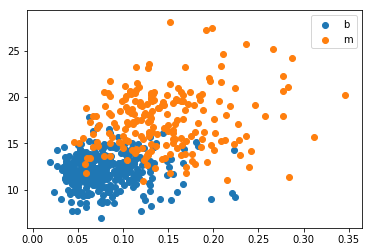

In [60]:
plt.scatter(df_b['compactness_mean'], df_b['radius_mean'], label='b')
plt.scatter(df_m['compactness_mean'], df_m['radius_mean'], label='m')
plt.legend()
plt.show()

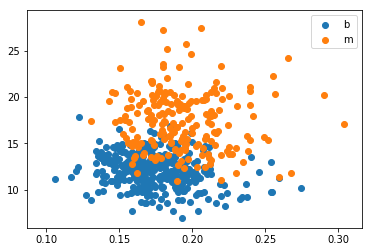

In [61]:
plt.scatter(df_b['symmetry_mean'], df_b['radius_mean'], label='b')
plt.scatter(df_m['symmetry_mean'], df_m['radius_mean'], label='m')
plt.legend()
plt.show()

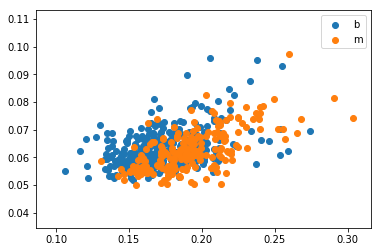

In [62]:
plt.scatter(df_b['symmetry_mean'], df_b['fractal_dimension_mean'], label='b')
plt.scatter(df_m['symmetry_mean'], df_m['fractal_dimension_mean'], label='m')
plt.legend()
plt.show()

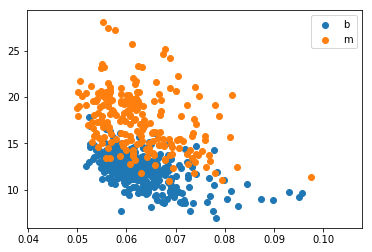

In [63]:
plt.scatter(df_b['fractal_dimension_mean'], df_b['radius_mean'], label='b')
plt.scatter(df_m['fractal_dimension_mean'], df_m['radius_mean'], label='m')
plt.legend()
plt.show()

In [64]:
labels = df['diagnosis']
df.drop(columns = ['diagnosis'], inplace=True)

###  Making sure the dataset is balanced but why? Deciding what metric to use for model evaluation

In [65]:
df_b.shape

(357, 13)

In [66]:
df_m.shape

(212, 13)

<br>

## Modeling and Cross Validation

- Doing the train-test split
- Building classifiers
- Hyperparameter tuning
- Testing/ Cross validation models using GridSeachCV and K-Fold cross validation


Our <b> goal </b> for classification is to find a <b>decision boundary</b> that best classifies each of the classes. 
For example if the two classes are represented by blue circle and red cross respectively, then


<img src = "images/decision_boundary.png">

In [52]:
x_train, x_test, y_train, y_test = train_test_split(df, labels)

## Model Generalization: Underfitting vs Overfitting
In machine learning, our goal is to generalize our model to predict results for unseen data. Real life data has noise/outliers/ and is not perfect.

What is <b>Underfitting</b>? <br>
It refers to a model that can neither model the training data nor generalize to new data. It's not suitable as it will have very poor performance. 

What is <b>Overfitting</b>?<br>
It refers to a model that models the training data too well. But what does this mean? It means that our model is not generalized for new training data, and is tightly fit to the training data. 
<br>
<br>

### But how can we prevent this? K-Fold Cross Validation or Resample

In [39]:
y_train.value_counts()  # making sure the train test split

0    269
1    157
Name: diagnosis, dtype: int64

##  First Algorithm: Gaussian Naive Bayes

#### What is Naive Bayes?
<img src="images/naive_bayes.png">

- Based on the Bayes Rule
- It assumes that all features are independent of each other (not correlated)
- Use the sunny/ rainy/ car/ bike/  being late or not late example
- Naive because of the independence assumption
- Make use of probability distribution for continuous data (gaussian here)

In [40]:
clf_naive_bayes = GaussianNB() 

### Hyperparameters: 
- priors: prior probability of labels if we don't want to use the ones calculated from data'
- var_smoothing: added to variances for calculation stability - default - 1e-9 

In [41]:
clf_naive_bayes.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred = clf_naive_bayes.predict(x_test)

In [43]:
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
accuracy_naive_bayes

0.9020979020979021

### We will use sklearn.cross_validation to do K-Fold cross validation, as we don't need hyperparams tuning

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
bayes_cross_val_scores = cross_val_score(clf_naive_bayes, df, labels, cv=10, scoring='accuracy')
bayes_cross_val_scores

array([0.9137931 , 0.87931034, 0.87719298, 0.89473684, 0.87719298,
       0.94736842, 0.87719298, 0.94642857, 0.875     , 0.92857143])

In [46]:
bayes_cross_val_scores.mean()

0.9016787658802178

### The accuracy score for Gaussian Naive Bayes is 0.90

## Second Algorithm: Support Vector Machine(SVM)

What is SVM?
<img src="images/svm_missing.png">

In SVM, the goal is to find an optimal hyperplane that seperates the two classes. The hyperplane forms the decision boundary. This is done by maximizing the margin between them, using the the 2 vectors for each class as support vectors, hence the name.

<img src="images/svm.png">

It may happen that our data is not linearly seperable, so we can't find a linear plane to seperate the data. In such a case, what we can use is the <b> Kernel Trick </b>. Let our dataset look something like this:

<img src="images/svm_1.png">

This is not linearly separable in the x, y plane. But what if we define z = x² + y²

<img src="images/svm_2.png">

In this, we can see that now our data is linearly separable as we added another dimension, or looked at the polynomial representation of the vectors. There's multiple kernels that can be used like rbf, poly, linear etc

In [47]:
clf_svm = svm.SVC(C = 1, kernel='rbf', gamma='auto')

### Hyperparameters:
- C: This regularization parameter is used for generalizing the model, and controls the trade off between fitting a small margin hyperplane/ fitting more points, compared to large margin hyperplane/generalizing better.
- kernel: This is part of the kernel trick ( linear, rbf, sigmoid, polynomial)
- gamma: This is intuitively the impact of points closer to decision boundary compared to the ones that are far. 

### Soft Margin SVM vs Hard Margin SVM

In real life, the data is noisy. We are expected to have some overlaps/outliers that we should not try to fit. Even if the data was linearly separable, we can’t use hard margin svm because of the overlap. Thus, we make use of Soft Margin SVM. This svm makes use of a parameter C, which basically defines how the SVM will handle errors. 

<img src="images/svm.jpg"> 

In [48]:
clf_svm.fit(x_train, y_train) # rbf kernel by default

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
y_pred = clf_svm.predict(x_test)
accuracy_rbf_svm = accuracy_score(y_test, y_pred)

In [50]:
accuracy_rbf_svm

0.8951048951048951

### We are going to use GridSearchCV for hyperparameter tuning and cross validation

In [51]:
param_grid = [
    {'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000, 10000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}
]

In [128]:
grid = GridSearchCV(clf_svm, param_grid, cv = 10, scoring='accuracy', n_jobs = -1)

In [129]:
grid.fit(df, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000, 10000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000, 10000], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [130]:
validation_results = pd.DataFrame(data=grid.cv_results_)
validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.012856,0.001336,0.002838,0.002327,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.931034,0.862069,...,0.943359,0.941406,0.939453,0.939453,0.947266,0.939571,0.947368,0.947368,0.943761,0.003352
1,0.057116,0.017294,0.001420,0.000461,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.965517,0.931034,...,0.966797,0.957031,0.962891,0.962891,0.968750,0.961014,0.959064,0.962963,0.963095,0.003412
2,0.363571,0.169363,0.001465,0.000489,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.982759,0.948276,...,0.972656,0.972656,0.970703,0.964844,0.972656,0.964912,0.968811,0.970760,0.969342,0.002902
3,3.118653,1.291629,0.001367,0.000479,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.982759,0.913793,...,0.972656,0.972656,0.970703,0.972656,0.974609,0.968811,0.972710,0.972710,0.972467,0.001603
4,16.486190,5.262552,0.001172,0.000390,10000,linear,NaN,"{'C': 10000, 'kernel': 'linear'}",0.948276,0.896552,...,0.966797,0.972656,0.968750,0.972656,0.974609,0.966862,0.972710,0.970760,0.970709,0.002616


In [131]:
grid.best_score_, grid.best_params_, grid.best_estimator_

(0.9701230228471002,
 {'C': 100, 'gamma': 0.01, 'kernel': 'poly'},
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [132]:
validation_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [133]:
validation_results[['param_kernel', 'param_C', 'mean_test_score', 'param_gamma', 'mean_train_score']].sort_values(by = 'mean_test_score', ascending=False).head(10)

,param_kernel,param_C,mean_test_score,param_gamma,mean_train_score
20,poly,100,0.970123,0.01,0.975008
6,poly,1,0.966608,0.1,0.979108
26,poly,1000,0.966608,0.01,0.979304
32,poly,10000,0.963093,0.01,0.981450
2,linear,100,0.961336,NaN,0.969342
3,linear,1000,0.959578,NaN,0.972467
18,poly,100,0.959578,0.1,0.976176
33,rbf,10000,0.957821,0.001,0.969929
14,poly,10,0.956063,0.01,0.964656
1,linear,10,0.956063,NaN,0.963095


## Third Algorithm: Logistic Regression

What is Logistic Regression?
<img src="images/log.jpg"> 

For data like this, the linear regression line can't fit: 
    <img src="images/Capture_loh.png">
Our hypothesis function looks like:
 <img src="images/log_reg.png">

Logistic Regression as the name suggests, seems like a combination of linear regression and the logistic function. That is in fact true. In linear regression, we learn θ for our hypothesis function. In Logistic Regression, we use the sigmoid function to get the probabilistic value for the predicted label between 0 and 1. If h(x) >= 0.5, the predicted label is 1 otherwise it is 0.   

We can think of hypothesis, hθ(x) estimated probability that y=1, on input 
                thus hθ(x)=P(y=1|x;θ)


 <img src="images/log_2.png"> 

 To find θ, we need to use a cost function and then minimize it. For this, we model the cost function using log loss and then use gradient descent to minimize it.
 <img src = "images/log_loss.png">

In [55]:
clf_logistic = LogisticRegression()

### Hyperparameters:
- C: This regularization parameter is used for generalizing the model, and controls the trade off between fitting a small margin hyperplane/ fitting more points, compared to large margin hyperplane/generalizing better.
- penalty (either l1 or l2): This refers to the norm, and how we want to apply the regularization

In [135]:
clf_logistic.fit(x_train, y_train)
accuracy_score(clf_logistic.predict(x_test), y_test)

0.9090909090909091

### We are going to use GridSearchCV for hyperparameter tuning and cross validation

In [136]:
param_grid = {
    'C': [1,10,100,1000], 'penalty': ['l1', 'l2']
}

In [137]:
grid = GridSearchCV(clf_logistic, param_grid, cv = 10, scoring='accuracy', n_jobs = -1)

In [138]:
grid.fit(df, labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [139]:
validation_results = pd.DataFrame(data=grid.cv_results_)
validation_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.039734,0.008966,0.002240,0.000876,1,l1,"{'C': 1, 'penalty': 'l1'}",0.931034,0.879310,0.929825,...,0.945312,0.945312,0.939453,0.945312,0.949219,0.947368,0.941520,0.947368,0.946106,0.003374
1,0.015875,0.008287,0.001656,0.000446,1,l2,"{'C': 1, 'penalty': 'l2'}",0.896552,0.896552,0.877193,...,0.925781,0.933594,0.916016,0.916016,0.925781,0.927875,0.918129,0.931774,0.924819,0.006000
2,0.083949,0.007047,0.001558,0.000477,10,l1,"{'C': 10, 'penalty': 'l1'}",0.982759,0.931034,0.947368,...,0.970703,0.976562,0.966797,0.966797,0.970703,0.962963,0.968811,0.970760,0.970126,0.003788
3,0.008862,0.002837,0.001266,0.000446,10,l2,"{'C': 10, 'penalty': 'l2'}",0.931034,0.896552,0.912281,...,0.951172,0.951172,0.943359,0.943359,0.955078,0.949318,0.939571,0.951267,0.948449,0.004533
4,0.261488,0.036284,0.001461,0.000487,100,l1,"{'C': 100, 'penalty': 'l1'}",0.982759,0.931034,0.947368,...,0.972656,0.972656,0.972656,0.972656,0.978516,0.966862,0.974659,0.972710,0.972662,0.003021


In [140]:
grid.best_score_, grid.best_params_, grid.best_estimator_

(0.9630931458699473,
 {'C': 100, 'penalty': 'l1'},
 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))

In [141]:
validation_results[['param_penalty', 'param_C', 'mean_test_score', 'mean_train_score']].sort_values(by = 'mean_test_score', ascending=False).head(10)

,param_penalty,param_C,mean_test_score,mean_train_score
4,l1,100,0.963093,0.972662
6,l1,1000,0.961336,0.975591
7,l2,1000,0.961336,0.971882
2,l1,10,0.959578,0.970126
5,l2,100,0.957821,0.966612
3,l2,10,0.942004,0.948449
0,l1,1,0.934974,0.946106
1,l2,1,0.919156,0.924819


In [145]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Model Evaluation
Now that you have all these nice results, you may also want to look at how do you wish to evaluate your model? Accuracy is a good metric only for certain cases, but we can look at the confusion matrix to get a more holistic idea

In [149]:
log_best_clf = grid.best_estimator_
y_predicted = log_best_clf.predict(x_test)
confusion_matrix(log_best_clf.predict(x_test), y_test)

array([[85,  2],
       [ 2, 54]], dtype=int64)

In [151]:
print('Recall Score: {}'.format(recall_score(y_test, y_predicted)))

Recall Score: 0.9642857142857143


In [152]:
print('Precision Score: {}'.format(precision_score(y_test, y_predicted)))

Precision Score: 0.9642857142857143


## Comparison between different models, before and after doing hyperparameter tuning

In [82]:
improv = pd.DataFrame(data = { 'clf': ['naive_bayes', 'svm', 'logistic_regression'], 'before_accuracy': [89.5, 93.7, 91.6], 'after_accuracy': [90, 97, 96.3]})
improv

,clf,before_accuracy,after_accuracy
0,naive_bayes,89.5,90.0
1,svm,93.7,97.0
2,logistic_regression,91.6,96.3


In [83]:
improv['improvement'] = improv['after_accuracy'] - improv['before_accuracy']
improv

,clf,before_accuracy,after_accuracy,improvement
0,naive_bayes,89.5,90.0,0.5
1,svm,93.7,97.0,3.3
2,logistic_regression,91.6,96.3,4.7


## How to evaluate a classifier?
There's multiple ways in which we can evaluate a classifier.
- By looking at recall score, precision score etc
- By looking at the confusion matrix